In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv("/Users/suching/Downloads/IMDB_CLASSIFIER_SEARCH_200 (1).csv").dropna(subset=['metric_best_validation_accuracy'])

In [33]:
df.loc[df.Experiment_Name.str.contains("Baseline")].env_CLASSIFIER.value_counts()

lr      84
lstm    76
cnn     72
boe     59
Name: env_CLASSIFIER, dtype: int64

In [22]:
df['Experiment_Name'] = df.Experiment_Name.str.replace("IMDB_Classifier_Search_200__SEED1|IMDB_Classifier_Search_200__SEED2|IMDB_Classifier_Search_200__SEED3", "Baseline")

df['Experiment_Name'] = df.Experiment_Name.replace({"CLASSIFIER_WITH_NLL_VAE_SEARCH": "+NLL VAE", "CLASSIFIER_WITH_ELMO_SEARCH": "+ELMo", "CLASSIFIER_WITH_NPMI_VAE_SEARCH": "+NPMI VAE"})

In [23]:
df.groupby(['Experiment_Name']).metric_best_validation_accuracy.max()

Experiment_Name
+ELMo        0.7950
+NLL VAE     0.7940
+NPMI VAE    0.8422
Baseline     0.7768
Name: metric_best_validation_accuracy, dtype: float64

In [24]:
df.Experiment_Name.unique()

array(['+NPMI VAE', '+NLL VAE', 'Baseline', '+ELMo'], dtype=object)

[Text(0,0.5,'validation accuracy'), Text(0.5,0,'condition')]

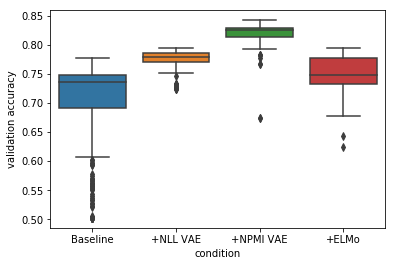

In [25]:
# master['env_ADD_VAE'] = master.env_ADD_VAE.replace({2: "CNN Baseline", 0: "CNN + ELMo", 1: "CNN + VAE"})
df = df.loc[df.Experiment_Name.isin(['Baseline', '+NLL VAE', '+NPMI VAE', '+ELMo'])]
ax = sns.boxplot(df.Experiment_Name, df.metric_best_validation_accuracy, order = ['Baseline', '+NLL VAE', '+NPMI VAE', '+ELMo'])
ax.set(xlabel='condition', ylabel='validation accuracy')

Text(0.5,1,'CNN')

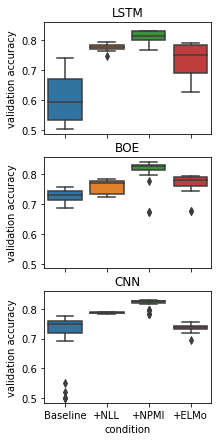

In [28]:
f, axes = plt.subplots(3, 1, figsize=(3, 7), sharex=True, sharey=True)
sub_df = df.loc[df.env_CLASSIFIER ==  'lstm']
sub_df = sub_df.loc[sub_df.Experiment_Name.isin(['Baseline', '+NLL VAE', '+NPMI VAE', '+ELMo'])]
ax = sns.boxplot(sub_df.Experiment_Name, sub_df.metric_best_validation_accuracy, order = ['Baseline', '+NLL VAE', '+NPMI VAE', '+ELMo'], ax=axes[0])
ax.set(xlabel='condition', ylabel='validation accuracy')
ax.set_xlabel('')
ax.set_title("LSTM")

sub_df = df.loc[df.env_CLASSIFIER ==  'boe']
sub_df = sub_df.loc[sub_df.Experiment_Name.isin(['Baseline', '+NLL VAE', '+NPMI VAE', '+ELMo'])]
ax = sns.boxplot(sub_df.Experiment_Name, sub_df.metric_best_validation_accuracy, order = ['Baseline', '+NLL VAE', '+NPMI VAE', '+ELMo'], ax=axes[1])
ax.set(ylabel='validation accuracy')
ax.set_xlabel('')
ax.set_title("BOE")

sub_df = df.loc[df.env_CLASSIFIER ==  'cnn']
sub_df = sub_df.loc[sub_df.Experiment_Name.isin(['Baseline', '+NLL VAE', '+NPMI VAE','+ELMo'])]
ax = sns.boxplot(sub_df.Experiment_Name, sub_df.metric_best_validation_accuracy, order = ['Baseline', '+NLL VAE', '+NPMI VAE', '+ELMo'], ax=axes[2])
ax.set(xlabel='condition', ylabel='validation accuracy')
ax.set_xticklabels(['Baseline', '+NLL', '+NPMI', '+ELMo'])
ax.set_title("CNN")